<a href="https://colab.research.google.com/github/srichandana498/DAV-assisgnment-167/blob/main/DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inline
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv.zip to netflix_titles.csv.zip


In [ ]:
# Step 1: Data Loading & Inspection
df = pd.read_csv('netflix_titles.csv.zip')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
# Show the first 5 rows
print("First 5 rows:")
print(df.head())

# Show the last 3 rows
print("\nLast 3 rows:")
print(df.tail())


First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Seas

In [31]:
# Display info about the dataset (column types, non-null counts)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [32]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isna().sum())



Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [73]:
# Data Cleaning
# Fill missing values with placeholders
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")
df['duration'] = df['duration'].fillna("Unknown")

# Display the first few rows to confirm changes
print(df.head())

# OR check for any remaining missing values
print(df.isnull().sum())
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [99]:
# Check the shape
print("Shape of dataset:", df.shape)

# Info
df.info()

# Description (only for numerical columns)
df.describe()


Shape of dataset: (8807, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              8807 non-null   object        
 1   type                 8807 non-null   object        
 2   title                8807 non-null   object        
 3   director             8807 non-null   object        
 4   cast                 8807 non-null   object        
 5   country              8807 non-null   object        
 6   date_added           8709 non-null   datetime64[ns]
 7   release_year         8807 non-null   int64         
 8   rating               8807 non-null   object        
 9   duration             8807 non-null   object        
 10  listed_in            8807 non-null   object        
 11  description          8807 non-null   object        
 12  decade               8807 non-null   int64         
 13  rele

,date_added,release_year,decade,release_year_zscore,duration_int
count,8709,8807.000000,8807.000000,8.807000e+03,8804.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,2009.108664,7.577401e-15,69.846888
min,2008-01-01 00:00:00,1925.000000,1920.000000,-1.011250e+01,1.000000
25%,2018-04-20 00:00:00,2013.000000,2010.000000,-1.338273e-01,2.000000
50%,2019-07-12 00:00:00,2017.000000,2010.000000,3.197486e-01,88.000000
75%,2020-08-26 00:00:00,2019.000000,2010.000000,5.465365e-01,106.000000
max,2021-09-25 00:00:00,2021.000000,2020.000000,7.733244e-01,312.000000
std,NaN,8.819312,9.228119,1.000057e+00,50.814828


In [100]:
# Null values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,0


In [36]:
# Basic Analysis (NumPy & Pandas)
# Basic statistics using NumPy
print("\nMean Release Year:", np.mean(df['release_year']))
print("Median Release Year:", np.median(df['release_year']))
print("Standard Deviation of Release Year:", np.std(df['release_year']))



Mean Release Year: 2014.1801975701146
Median Release Year: 2017.0
Standard Deviation of Release Year: 8.818811417623284


In [37]:
# Summary of object (string) columns
print("\nObject column summary:")
print(df.describe(include='object'))



Object column summary:
       show_id   type   title director     cast        country rating  \
count     8807   8807    8807     8807     8807           8807   8807   
unique    8807      2    8807     4529     7693            749     18   
top      s8807  Movie  Zubaan  Unknown  Unknown  United States  TV-MA   
freq         1   6131       1     2634      825           2818   3207   

        duration                     listed_in  \
count       8807                          8807   
unique       221                           514   
top     1 Season  Dramas, International Movies   
freq        1793                           362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  


In [85]:
# Normalize release year using z-score
release_mean = np.mean(df['release_year'])
release_std = np.std(df['release_year'])
df['release_year_zscore'] = (df['release_year'] - release_mean) / release_std

# Boolean indexing using NumPy: Titles between 2015 and 2020
# Normalize release year using z-score
release_mean = np.mean(df['release_year'])
release_std = np.std(df['release_year'])
df['release_year_zscore'] = (df['release_year'] - release_mean) / release_std

# Boolean indexing using NumPy: Titles between 2015 and 2020
years = df['release_year'].values
recent_titles = df[np.logical_and(years >= 2015, years <= 2020)]

print("\nNumber of titles released between 2015 and 2020:", len(recent_titles))


Number of titles released between 2015 and 2020: 5624


In [91]:
# Group by decade and content type
grouped = df.groupby(['decade', 'type']).size().reset_index(name='count')
print("\nContent count by decade and type:")
print(grouped)


Content count by decade and type:
    decade     type  count
0     1920  TV Show      1
1     1940    Movie     13
2     1940  TV Show      2
3     1950    Movie     11
4     1960    Movie     23
5     1960  TV Show      2
6     1970    Movie     66
7     1970  TV Show      4
8     1980    Movie    122
9     1980  TV Show      7
10    1990    Movie    241
11    1990  TV Show     33
12    2000    Movie    677
13    2000  TV Show    133
14    2010    Movie   4184
15    2010  TV Show   1743
16    2020    Movie    794
17    2020  TV Show    751


In [38]:
# Filter records: shows released after 2015
after_2015 = df[df['release_year'] > 2015]
print("\nNumber of titles released after 2015:", after_2015.shape[0])


Number of titles released after 2015: 5656


In [39]:
# Sort by release year (newest first)
sorted_df = df.sort_values(by='release_year', ascending=False)
print("\nTop 5 newest titles:")
print(sorted_df[['title', 'release_year']].head())



Top 5 newest titles:
                    title  release_year
1           Blood & Water          2021
2               Ganglands          2021
3   Jailbirds New Orleans          2021
31     Chicago Party Aunt          2021
30        Ankahi Kahaniya          2021


In [75]:
# Advanced Pandas Operations
# Add a new column for decade
df['decade'] = (df['release_year'] // 10) * 10

# Group by decade and content type
grouped = df.groupby(['decade', 'type']).size().reset_index(name='count')
print("\nContent count by decade and type:")
print(grouped)


Content count by decade and type:
    decade     type  count
0     1920  TV Show      1
1     1940    Movie     13
2     1940  TV Show      2
3     1950    Movie     11
4     1960    Movie     23
5     1960  TV Show      2
6     1970    Movie     66
7     1970  TV Show      4
8     1980    Movie    122
9     1980  TV Show      7
10    1990    Movie    241
11    1990  TV Show     33
12    2000    Movie    677
13    2000  TV Show    133
14    2010    Movie   4184
15    2010  TV Show   1743
16    2020    Movie    794
17    2020  TV Show    751

Pivot Table 1 – Releases by Type:
         release_year
type                 
Movie            6131
TV Show          2676


In [76]:
# Pivot Table 1: Number of releases by type
pivot1 = pd.pivot_table(df, index='type', values='release_year', aggfunc='count')
print("\nPivot Table 1 – Releases by Type:")
print(pivot1)


Pivot Table 1 – Releases by Type:
         release_year
type                 
Movie            6131
TV Show          2676


In [43]:
# Pivot Table 2: Count of titles by rating and type
pivot2 = pd.pivot_table(df, index='rating', columns='type', values='title', aggfunc='count')
print("\nPivot Table 2 – Ratings by Type:")
print(pivot2)



Pivot Table 2 – Ratings by Type:
type        Movie  TV Show
rating                    
66 min        1.0      NaN
74 min        1.0      NaN
84 min        1.0      NaN
G            41.0      NaN
NC-17         3.0      NaN
NR           75.0      5.0
Not Rated     2.0      2.0
PG          287.0      NaN
PG-13       490.0      NaN
R           797.0      2.0
TV-14      1427.0    733.0
TV-G        126.0     94.0
TV-MA      2062.0   1145.0
TV-PG       540.0    323.0
TV-Y        131.0    176.0
TV-Y7       139.0    195.0
TV-Y7-FV      5.0      1.0
UR            3.0      NaN


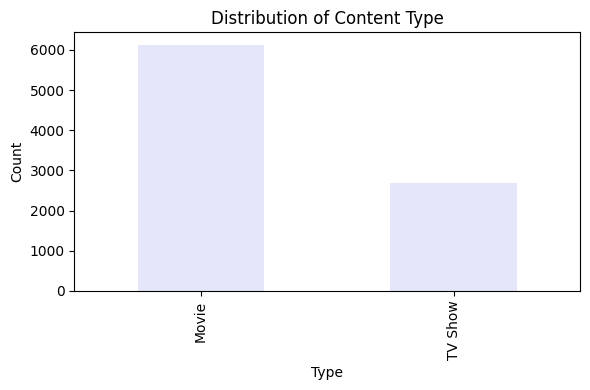

In [80]:
# Data Visualization
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color='Lavender')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



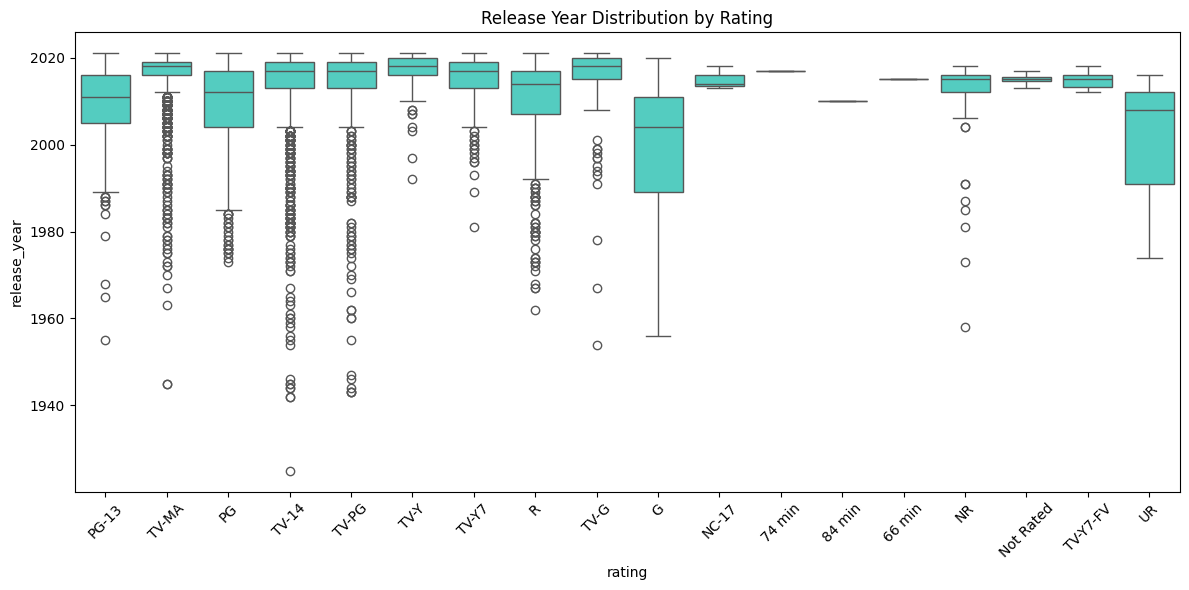

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# B. Seaborn: Number of titles released per year (2000+)
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='release_year', data=df, color='turquoise')  # Using turquoise
plt.title('Release Year Distribution by Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


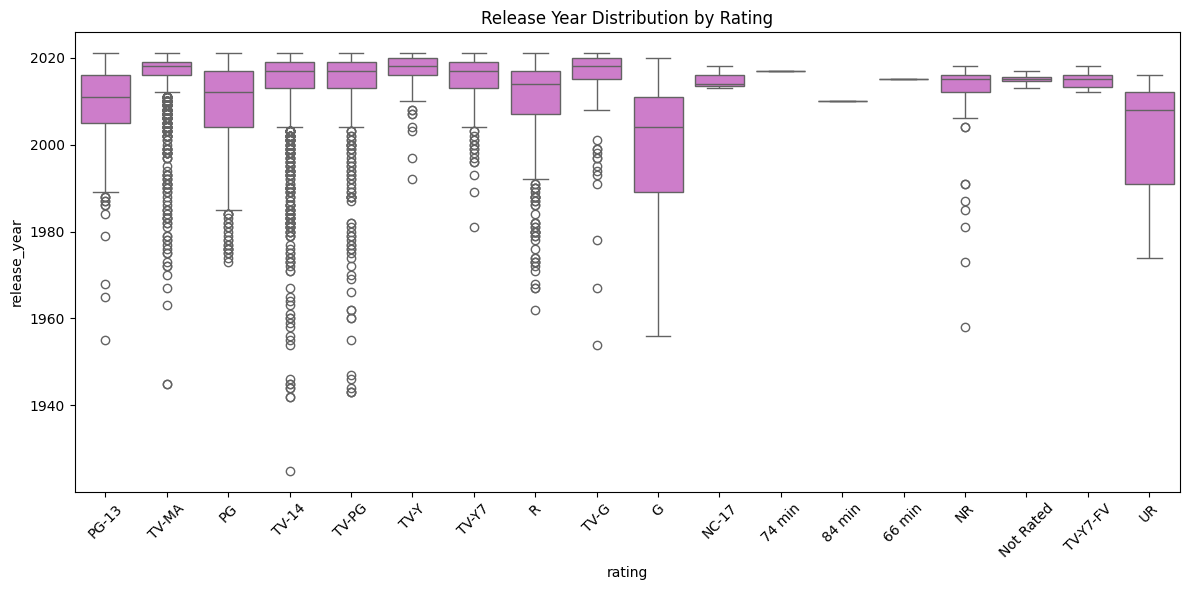

In [84]:
# C. Seaborn: Boxplot of release year by rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='release_year', data=df, color='orchid')
plt.title('Release Year Distribution by Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




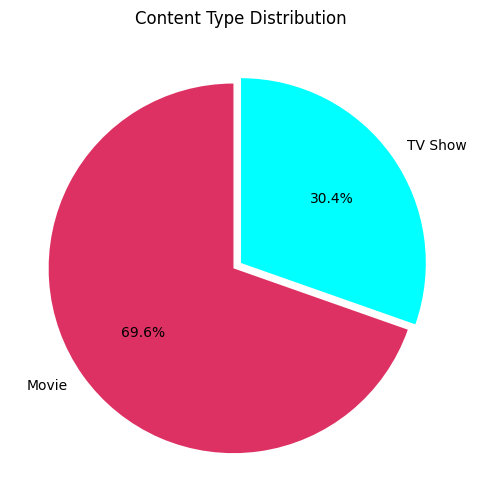

In [90]:
import matplotlib.pyplot as plt
custom_colors = ['#de3163', '#00ffff']

plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0],
    colors=custom_colors
)
plt.title('Content Type Distribution')
plt.ylabel('')
plt.show()


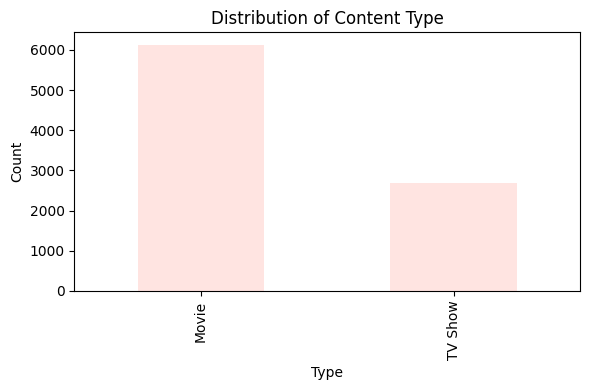

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color='Mistyrose')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


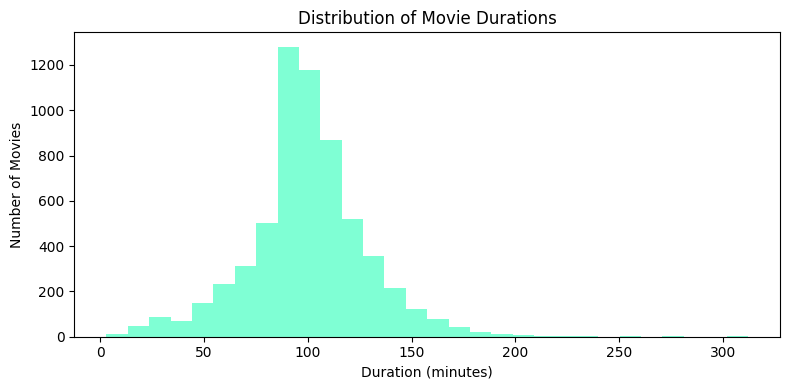

In [98]:
# Extract duration in minutes
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# Filter only movies
movie_df = df[df['type'] == 'Movie']

plt.figure(figsize=(8, 4))
plt.hist(movie_df['duration_int'].dropna(), bins=30, color='Aquamarine')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


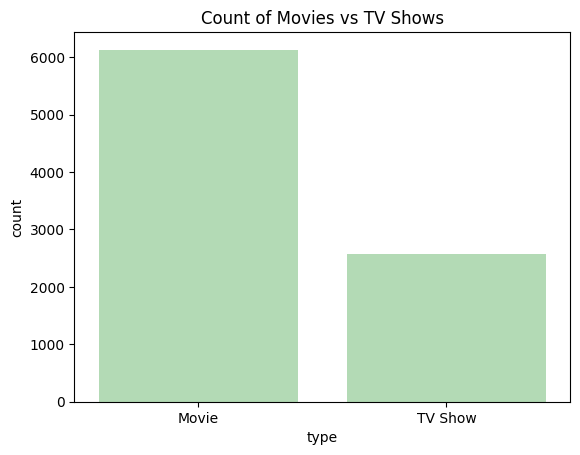

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='type', color='#ACE1AF')
plt.title('Count of Movies vs TV Shows')
plt.show()


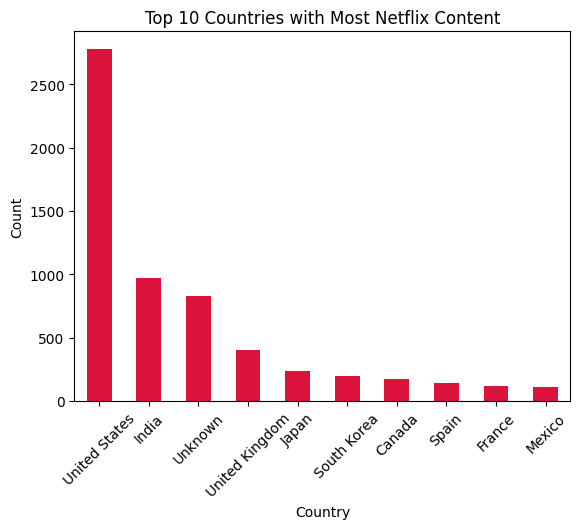

In [105]:
# Top 10 countries with most Netflix content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='Crimson')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


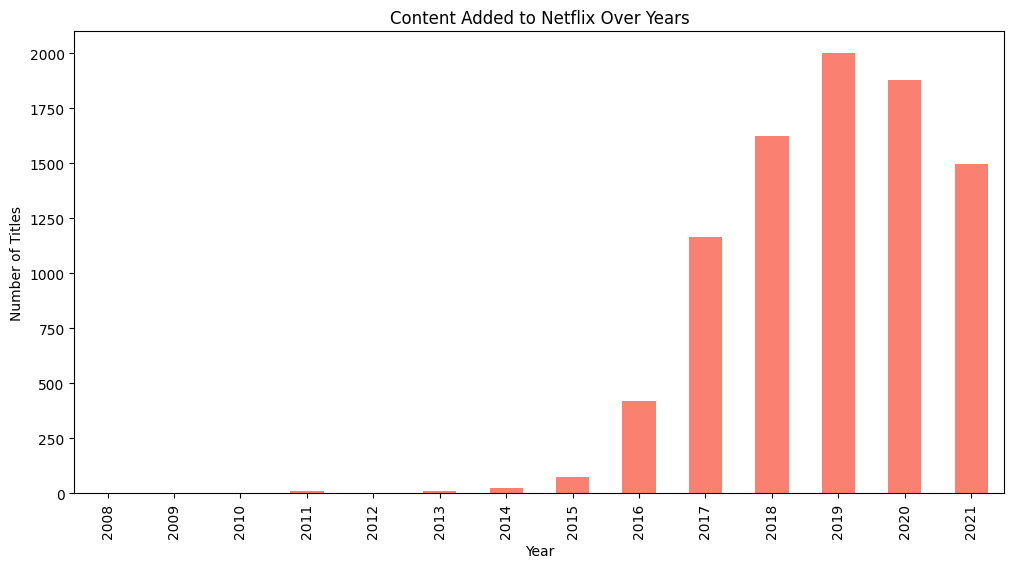

In [106]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Content added by year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='Salmon')
plt.title('Content Added to Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

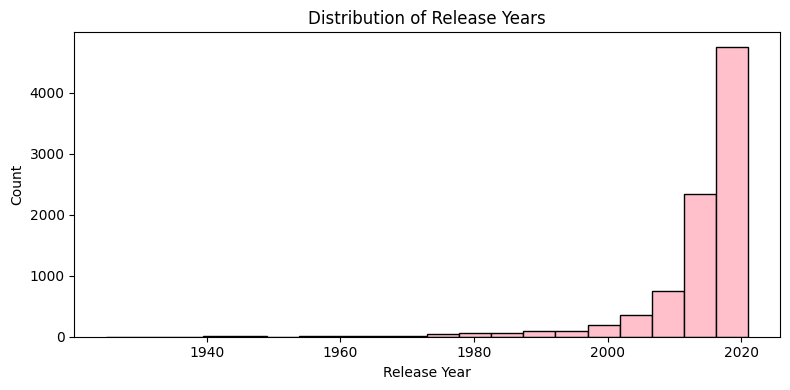

In [108]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in 'netflix_titles.csv.zip'
df = pd.read_csv('netflix_titles.csv.zip') # This line loads the dataframe. If your data is stored elsewhere, change the file path accordingly.

# Convert 'release_year' to numeric (it already should be)
plt.figure(figsize=(8, 4))
plt.hist(df['release_year'], bins=20, color='Pink', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

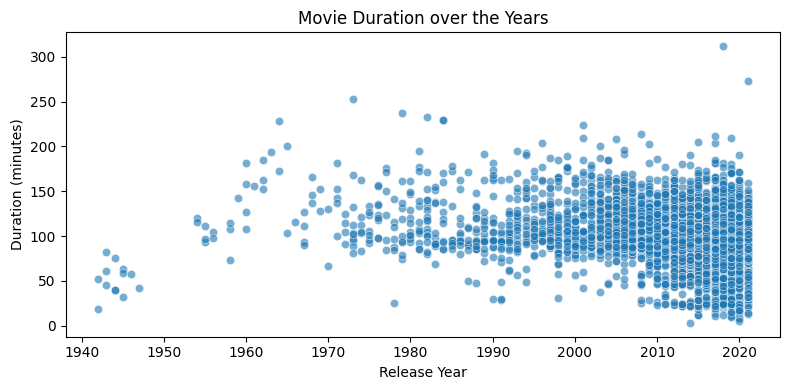

In [25]:
# Filter only Movies to extract duration in minutes
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric part of the duration
movies_df['duration_int'] = movies_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='release_year', y='duration_int', data=movies_df, alpha=0.6)
plt.title('Movie Duration over the Years')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

<ipython-input-26-10ed42d985d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='duration_int', data=filtered_movies, palette='Set2')


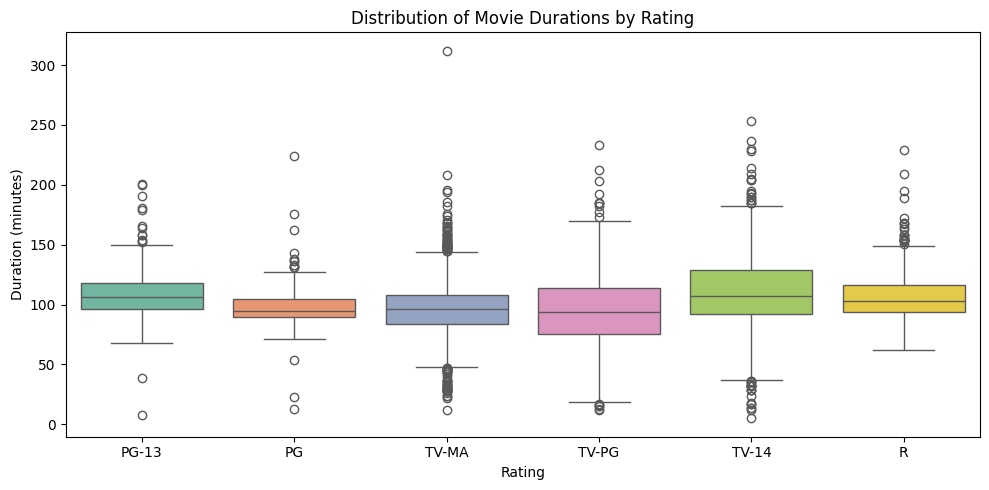

In [26]:
plt.figure(figsize=(10, 5))
top_ratings = movies_df['rating'].value_counts().nlargest(6).index
filtered_movies = movies_df[movies_df['rating'].isin(top_ratings)]

sns.boxplot(x='rating', y='duration_int', data=filtered_movies, palette='Set2')
plt.title('Distribution of Movie Durations by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np

# Load dataset - Assuming the data was uploaded as a zip file.
df = pd.read_csv('netflix_titles.csv.zip')  # Use the correct filename

# Filter only Movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes
movies_df['duration_int'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Z-score normalization of duration
duration_mean = np.mean(movies_df['duration_int'])
duration_std = np.std(movies_df['duration_int'])
movies_df['duration_zscore'] = (movies_df['duration_int'] - duration_mean) / duration_std

# Boolean indexing: Movies between 90 and 120 minutes
durations = movies_df['duration_int'].values
feature_films = movies_df[np.logical_and(durations >= 90, durations <= 120)]

# Output
print("Mean duration:", duration_mean)
print("Standard deviation of duration:", duration_std)
print("Number of feature-length films (90–120 mins):", len(feature_films))
print("\nSample feature-length films:")
print(feature_films[['title', 'duration_int']].head())

Mean duration: 99.57718668407311
Standard deviation of duration: 28.2882850476381
Number of feature-length films (90–120 mins): 3148

Sample feature-length films:
                               title  duration_int
0               Dick Johnson Is Dead          90.0
6   My Little Pony: A New Generation          91.0
9                       The Starling         104.0
13  Confessions of an Invisible Girl          91.0
18                         Intrusion          94.0
